# Group Activity 9

## First let's train a random forest model

In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [2]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# TODO
# Split dataset into training set and test set, 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
#Create a random forest classifier with 100 estimators
clf = RandomForestClassifier(n_estimators=100, random_state=0)
#Train the model using the training sets
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [4]:
from sklearn import metrics

y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


## Figure out importance of features


In [5]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

petal length (cm)    0.460360
petal width (cm)     0.409184
sepal length (cm)    0.107865
sepal width (cm)     0.022592
dtype: float64
<class 'pandas.core.series.Series'>


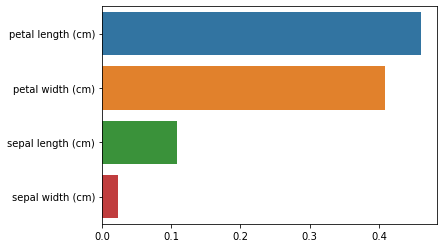

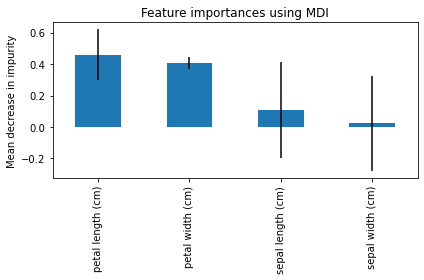

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# TODO
# feature_importances_ is the importance "array" to visualize 
importances = clf.feature_importances_
# here is an example: 
feature_imp = pd.Series(importances,index=iris.feature_names).sort_values(ascending=False)
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

print(feature_imp)
print(type(feature_imp))

# TODO
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

fig, ax = plt.subplots()
feature_imp.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# TODO Add labels to your graph


# plt.legend()
plt.show()